# Import the nesessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
from tqdm import tqdm
import math

# Mounth Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path='/content/drive/MyDrive/CVPR/Animals'

Mounted at /content/drive


# Let's check the categories of the dataset using listdir which enables of access the folders.

In [3]:
categories=os.listdir(data_path)
print(categories)

['Leopard', 'Cheetah', 'Tiger', 'Jaguar', 'Lion']


# Data Preprocessing
1. for preprocessing, we will store the images in a list train_data, each element of the list contains two items, the image as img_arr and the label of the image as class_index which is the folder name containing the images.
2. We will also convert the image gray scale color for easy calculation and resize the image as (256,256)
3. let's also print the total number of images. **bold text**

100%|██████████| 32/32 [00:00<00:00, 83.41it/s]


170


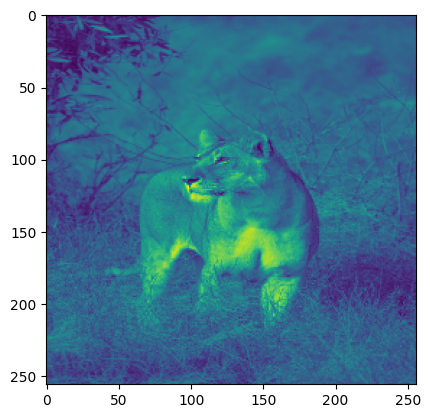

In [10]:
train_data = []
for c in categories:
    path = os.path.join(data_path,c)
    class_index = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_arr=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(img_arr,(256,256))
        plt.imshow(img_arr)
        train_data.append([img_arr, class_index])
print(len(train_data))


# Image Shuffling
Now let's suffle the data. The purpose is that by shuffling we will ensure the images are randomize for training and the model learns from all the labels each time. Let's also print some images with their label.

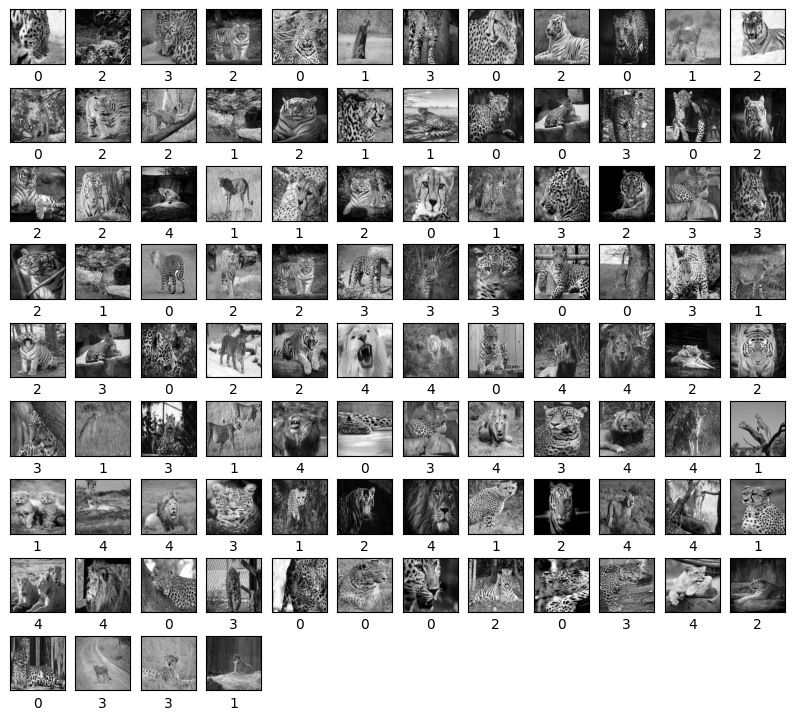

In [5]:
random.shuffle(train_data)
plt.figure(figsize=(10,10))
i=0
for r in range(10):
  for c in range(10):
    plt.subplot(10,12,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()


There are 170 images in total. Let's take 34 images in each fold and in total, there are 5 folds.

In [6]:
f0=train_data[0:34]
f1=train_data[34:68]
f2=train_data[68:102]
f3=train_data[102:136]
f4=train_data[136:170]

let's take the value of k from 1 to 30 in a list.

In [7]:
accuracy_l2=[]
K = list(range(1, 31))

# Model Building
1. We will use a loop, where in each iteration, one fold is used as the validation set, and the remaining folds are combined as the training set.
2. Midpoint accuracy for each fold will be stored in an array, and individual fold accuracies for different values of
K will be stored in another array.
3. In each iteration, the following steps are performed:
a. Compute the L2 distance between each validation sample and all training samples.
b. Sort the distances and select the  K-nearest neighbors to predict the label.
c. Calculate accuracy for the current
K and store it.
d. Compute the midpoint accuracy and update the arrays.

In [8]:
folds = [f0, f1, f2, f3, f4]

mid_point_accuracy_l2 = []
fold_accuracies_l2 = [[] for _ in range(len(folds))]

for i in range(len(folds)):
    validation = folds[i]
    train = [f for j, f in enumerate(folds) if j != i]
    train = sum(train, [])
    total_accuracy_l2 = []
    mid_point_accuracy_per_fold_l2 = []

    for k in K:
        accuracy_l2 = 0

        for v in tqdm(validation):
            scores_l2 = []

            for t in train:
                l2_dist = np.sqrt(np.sum((t[0] - v[0])**2))
                scores_l2.append([l2_dist, t[1]])

            sorted_scores_l2 = sorted(scores_l2, key=lambda a: a[0])
            top_k2 = [sorted_scores_l2[i][1] for i in range(k)]
            pred_label_l2 = max(set(top_k2), key=top_k2.count)

            if pred_label_l2 == v[1]:
                accuracy_l2 += 1

        accuracy_l2 = accuracy_l2 / len(validation) * 100
        print(f"Fold {i+1}, k = {k}")
        print(f"L2 Accuracy: {accuracy_l2:.2f}%")

        total_accuracy_l2.append(accuracy_l2)
        midPoint_l2 = (min(total_accuracy_l2) + max(total_accuracy_l2)) / 2
        mid_point_accuracy_per_fold_l2.append(midPoint_l2)
        fold_accuracies_l2[i].append(accuracy_l2)

    mid_point_accuracy_l2.append(mid_point_accuracy_per_fold_l2)

dlt_arrays_l2 = [np.array(x) for x in mid_point_accuracy_l2]
new_mid_point_accuracy_l2 = [np.mean(k) for k in zip(*dlt_arrays_l2)]

100%|██████████| 34/34 [00:00<00:00, 92.24it/s]


Fold 1, k = 1
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 85.38it/s]


Fold 1, k = 2
L2 Accuracy: 44.12%


100%|██████████| 34/34 [00:00<00:00, 96.20it/s]


Fold 1, k = 3
L2 Accuracy: 41.18%


100%|██████████| 34/34 [00:00<00:00, 94.95it/s]


Fold 1, k = 4
L2 Accuracy: 50.00%


100%|██████████| 34/34 [00:00<00:00, 91.48it/s]


Fold 1, k = 5
L2 Accuracy: 38.24%


100%|██████████| 34/34 [00:00<00:00, 97.89it/s]


Fold 1, k = 6
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 93.14it/s]


Fold 1, k = 7
L2 Accuracy: 44.12%


100%|██████████| 34/34 [00:00<00:00, 93.52it/s]


Fold 1, k = 8
L2 Accuracy: 41.18%


100%|██████████| 34/34 [00:00<00:00, 98.32it/s]


Fold 1, k = 9
L2 Accuracy: 38.24%


100%|██████████| 34/34 [00:00<00:00, 90.74it/s]


Fold 1, k = 10
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 98.19it/s]


Fold 1, k = 11
L2 Accuracy: 44.12%


100%|██████████| 34/34 [00:00<00:00, 98.83it/s]


Fold 1, k = 12
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 87.69it/s]


Fold 1, k = 13
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 96.50it/s]


Fold 1, k = 14
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 99.34it/s] 


Fold 1, k = 15
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 70.69it/s]


Fold 1, k = 16
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 77.21it/s]


Fold 1, k = 17
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 73.15it/s]


Fold 1, k = 18
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 76.91it/s]


Fold 1, k = 19
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 68.28it/s]


Fold 1, k = 20
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 76.22it/s]


Fold 1, k = 21
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 41.19it/s]


Fold 1, k = 22
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 45.99it/s]


Fold 1, k = 23
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 67.53it/s]


Fold 1, k = 24
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 63.33it/s]


Fold 1, k = 25
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 93.70it/s]


Fold 1, k = 26
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 94.69it/s]


Fold 1, k = 27
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 97.79it/s]


Fold 1, k = 28
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 97.24it/s]


Fold 1, k = 29
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 92.94it/s]


Fold 1, k = 30
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 96.87it/s]


Fold 2, k = 1
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 99.30it/s] 


Fold 2, k = 2
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 93.49it/s]


Fold 2, k = 3
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 95.35it/s]


Fold 2, k = 4
L2 Accuracy: 44.12%


100%|██████████| 34/34 [00:00<00:00, 93.85it/s]


Fold 2, k = 5
L2 Accuracy: 47.06%


100%|██████████| 34/34 [00:00<00:00, 96.06it/s]


Fold 2, k = 6
L2 Accuracy: 41.18%


100%|██████████| 34/34 [00:00<00:00, 97.38it/s]


Fold 2, k = 7
L2 Accuracy: 41.18%


100%|██████████| 34/34 [00:00<00:00, 95.49it/s]


Fold 2, k = 8
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 97.14it/s]


Fold 2, k = 9
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 99.98it/s] 


Fold 2, k = 10
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 94.31it/s]


Fold 2, k = 11
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 96.93it/s]


Fold 2, k = 12
L2 Accuracy: 38.24%


100%|██████████| 34/34 [00:00<00:00, 96.60it/s]


Fold 2, k = 13
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 91.24it/s]


Fold 2, k = 14
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 95.06it/s]


Fold 2, k = 15
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 94.96it/s]


Fold 2, k = 16
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 95.71it/s]


Fold 2, k = 17
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 96.42it/s]


Fold 2, k = 18
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 92.67it/s]


Fold 2, k = 19
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 100.11it/s]


Fold 2, k = 20
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 67.03it/s]


Fold 2, k = 21
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 74.67it/s]


Fold 2, k = 22
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 70.54it/s]


Fold 2, k = 23
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 73.41it/s]


Fold 2, k = 24
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 73.90it/s]


Fold 2, k = 25
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 68.38it/s]


Fold 2, k = 26
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 67.14it/s]


Fold 2, k = 27
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 67.53it/s]


Fold 2, k = 28
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 74.31it/s]


Fold 2, k = 29
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 92.34it/s]


Fold 2, k = 30
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 97.53it/s]


Fold 3, k = 1
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 87.24it/s]


Fold 3, k = 2
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 95.19it/s]


Fold 3, k = 3
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 98.47it/s]


Fold 3, k = 4
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 92.25it/s]


Fold 3, k = 5
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 97.52it/s]


Fold 3, k = 6
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 97.11it/s]


Fold 3, k = 7
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 87.91it/s]


Fold 3, k = 8
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 94.21it/s]


Fold 3, k = 9
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 94.29it/s]


Fold 3, k = 10
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 95.10it/s]


Fold 3, k = 11
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 96.07it/s]


Fold 3, k = 12
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 89.76it/s]


Fold 3, k = 13
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 98.30it/s]


Fold 3, k = 14
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 96.60it/s]


Fold 3, k = 15
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 89.72it/s]


Fold 3, k = 16
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 96.32it/s]


Fold 3, k = 17
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 97.95it/s]


Fold 3, k = 18
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 90.05it/s]


Fold 3, k = 19
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 97.50it/s]


Fold 3, k = 20
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 91.75it/s]


Fold 3, k = 21
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 94.74it/s]


Fold 3, k = 22
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 95.59it/s]


Fold 3, k = 23
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 91.81it/s]


Fold 3, k = 24
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 97.07it/s]


Fold 3, k = 25
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 87.94it/s]


Fold 3, k = 26
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 66.70it/s]


Fold 3, k = 27
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 75.61it/s]


Fold 3, k = 28
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 68.78it/s]


Fold 3, k = 29
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 75.34it/s]


Fold 3, k = 30
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 72.10it/s]


Fold 4, k = 1
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 73.10it/s]


Fold 4, k = 2
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 69.16it/s]


Fold 4, k = 3
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 67.86it/s]


Fold 4, k = 4
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 68.93it/s]


Fold 4, k = 5
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 94.51it/s]


Fold 4, k = 6
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 94.81it/s]


Fold 4, k = 7
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 97.17it/s]


Fold 4, k = 8
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 95.00it/s]


Fold 4, k = 9
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 91.92it/s]


Fold 4, k = 10
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 95.72it/s]


Fold 4, k = 11
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 98.18it/s]


Fold 4, k = 12
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 92.47it/s]


Fold 4, k = 13
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 95.99it/s]


Fold 4, k = 14
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 93.99it/s]


Fold 4, k = 15
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 93.53it/s]


Fold 4, k = 16
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 94.55it/s]


Fold 4, k = 17
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 94.59it/s]


Fold 4, k = 18
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 94.43it/s]


Fold 4, k = 19
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 95.11it/s]


Fold 4, k = 20
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 90.26it/s]


Fold 4, k = 21
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 96.47it/s]


Fold 4, k = 22
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 91.37it/s]


Fold 4, k = 23
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 92.44it/s]


Fold 4, k = 24
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 94.79it/s]


Fold 4, k = 25
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 94.68it/s]


Fold 4, k = 26
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 95.69it/s]


Fold 4, k = 27
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 93.71it/s]


Fold 4, k = 28
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 92.07it/s]


Fold 4, k = 29
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 97.95it/s]


Fold 4, k = 30
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 92.57it/s]


Fold 5, k = 1
L2 Accuracy: 44.12%


100%|██████████| 34/34 [00:00<00:00, 84.36it/s]


Fold 5, k = 2
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 72.16it/s]


Fold 5, k = 3
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 73.58it/s]


Fold 5, k = 4
L2 Accuracy: 38.24%


100%|██████████| 34/34 [00:00<00:00, 77.57it/s]


Fold 5, k = 5
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 71.51it/s]


Fold 5, k = 6
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 76.38it/s]


Fold 5, k = 7
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 74.77it/s]


Fold 5, k = 8
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 68.82it/s]


Fold 5, k = 9
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 67.68it/s]


Fold 5, k = 10
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 68.75it/s]


Fold 5, k = 11
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 85.50it/s]


Fold 5, k = 12
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 95.86it/s]


Fold 5, k = 13
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 97.38it/s]


Fold 5, k = 14
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 90.94it/s]


Fold 5, k = 15
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 97.72it/s]


Fold 5, k = 16
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 93.71it/s]


Fold 5, k = 17
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 86.38it/s]


Fold 5, k = 18
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 97.24it/s]


Fold 5, k = 19
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 91.53it/s]


Fold 5, k = 20
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 95.11it/s]


Fold 5, k = 21
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 97.75it/s]


Fold 5, k = 22
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 91.49it/s]


Fold 5, k = 23
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 97.38it/s]


Fold 5, k = 24
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 96.17it/s]


Fold 5, k = 25
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 91.18it/s]


Fold 5, k = 26
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 94.76it/s]


Fold 5, k = 27
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 93.12it/s]


Fold 5, k = 28
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 93.61it/s]


Fold 5, k = 29
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 97.31it/s]

Fold 5, k = 30
L2 Accuracy: 14.71%


# Result Visualization
Finally, we will plot the accuracy for each fold and the average midpoint accuracy.

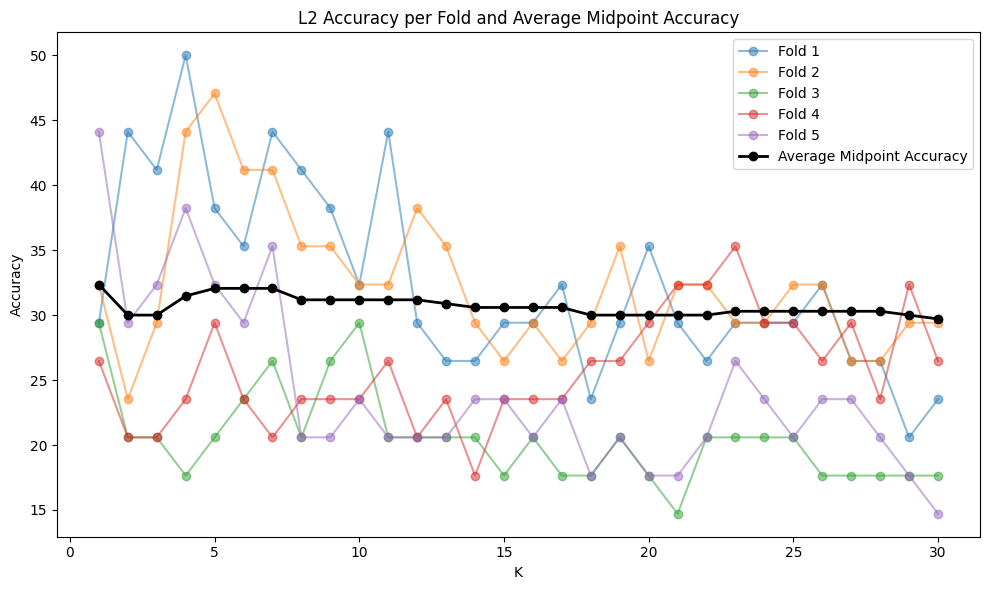

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, fold_accuracy in enumerate(fold_accuracies_l2):
    ax.plot(K, fold_accuracy, 'o-', label=f'Fold {i+1}', alpha=0.5)

ax.plot(K, new_mid_point_accuracy_l2, 'o-', color='black', label='Average Midpoint Accuracy', linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.legend(loc='best')
ax.set_title('L2 Accuracy per Fold and Average Midpoint Accuracy')
plt.tight_layout()
plt.show()